# Milk Quality Prediction

***(Paramesh.T)***

About Dataset:

Milk Quality Prediction (Classification)

It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

Usage
The target variable is nothing but the Grade of the milk.

    Target

    Low (Bad)

    Medium (Moderate)

    High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
Temperature and ph are given their actual values in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
milk = pd.read_csv(r'C:\Users\PARAMESH\Desktop\ML Projects\projects\Datasets\milknew.csv')
milk["Grade"].replace({"high":2,"medium":1,"low":0},inplace=True)
X = milk.iloc[:, :-1].values
y = milk.iloc[:, -1].values

In [3]:
milk.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [4]:
milk.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2
1058,8.6,55,0,1,1,1,255,0


In [5]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.2 KB


In [6]:
milk.shape

(1059, 8)

In [7]:
milk['Grade'].value_counts()

0    429
1    374
2    256
Name: Grade, dtype: int64

In [8]:
milk.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.836638
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.787868
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [9]:
milk.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


<AxesSubplot:xlabel='count', ylabel='pH'>

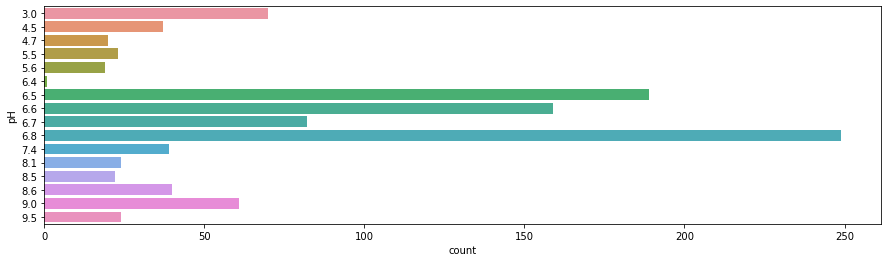

In [10]:
plt.figure(figsize=(15,4))
sns.countplot(data=milk,y='pH')

<AxesSubplot:>

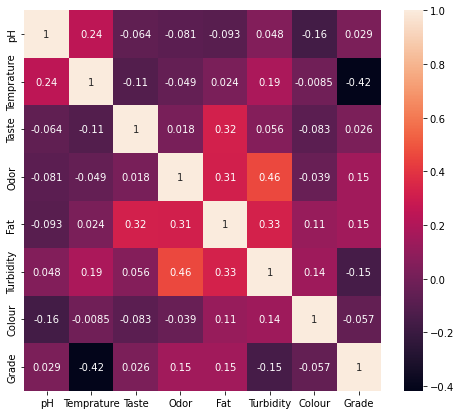

In [11]:
plt.figure(figsize=(8,7))
sns.heatmap(milk.corr(),annot=True)

In [ ]:
sns.pairplot(milk,hue = 'Grade',markers=["o", "s", "D"])

In [ ]:
sns.distplot(milk['Grade'])

In [ ]:
sns.jointplot(data=milk, x='pH', y='Colour', hue='Grade', kind='scatter', height=10,color = 'b')

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=milk,x='pH',y='Colour',hue='Grade')
plt.title('pH vs Colour')

In [ ]:
g = sns.PairGrid(milk)
g.map(sns.scatterplot)

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
print(classifier.score(X_train,y_train))

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
logReg_acc = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print(classifier.score(X_train,y_train))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
nb_acc= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
print(classifier.score(X_train,y_train))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
svm_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
print(classifier.score(X_train,y_train))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
knn_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print(classifier.score(X_train,y_train))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt_acc = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classifier.score(X_train,y_train))

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print(classifier.score(X_train,y_train))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
rf_acc = accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# XGBoost

In [ ]:
!pip install xgboost==1.6.2

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
xgb_acc=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy:  {:.2f} %".format(accuracies.mean()*100))

# Inference

In [ ]:
models=pd.DataFrame({'Models':['LogisticRegression', 'Naive_bayes','SVM','KNNeighbors', 'DecisionTree', 'RandomForest','XG_Boost'],'Accuracy':[logReg_acc,nb_acc,svm_acc,knn_acc,dt_acc,rf_acc,xgb_acc]})
models

In [ ]:
models=pd.DataFrame({'Models':['LogisticRegression', 'Naive_bayes','SVM','KNNeighbors', 'DecisionTree', 'RandomForest','XG_Boost'],'Accuracy':[logReg_acc,nb_acc,svm_acc,knn_acc,dt_acc,rf_acc,xgb_acc]})
models

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=models['Models'],y=models['Accuracy'])

**Hence, we conclude K-Nearest Neighbor is the best fit for this data set..**

**Using KNN model we get 98.5 % accuracy score.**